### GPU check # if u got and cuda stuff python  version 9 - 12 cuda support to 12.8

#### https://pytorch.org/get-started/locally/

In [4]:
import torch
print("CUDA Available:", torch.cuda.is_available())

x = torch.rand(5, 3)
print(x)

CUDA Available: True
tensor([[0.1504, 0.7929, 0.0386],
        [0.3291, 0.3051, 0.6747],
        [0.5119, 0.5535, 0.9503],
        [0.2194, 0.5041, 0.7887],
        [0.6845, 0.8108, 0.3162]])


In [2]:
!nvidia-smi

Fri May  2 00:02:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.28                 Driver Version: 576.28         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   40C    P8              5W /   95W |       0MiB /   6141MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
!pip list | grep torch 

'grep' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import torch
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2025 NVIDIA Corporation
Built on Fri_Feb_21_20:42:46_Pacific_Standard_Time_2025
Cuda compilation tools, release 12.8, V12.8.93
Build cuda_12.8.r12.8/compiler.35583870_0
torch:  2.7 ; cuda:  cu128


In [5]:
list(range(torch.cuda.device_count()))

[0]

In [7]:
print(torch.cuda.device_count())


print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

1
0
NVIDIA GeForce RTX 4050 Laptop GPU


In [8]:
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

NVIDIA GeForce RTX 4050 Laptop GPU
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [2]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.122  Python-3.12.10 torch-2.7.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
Setup complete  (16 CPUs, 15.2 GB RAM, 25.1/931.5 GB disk)


In [ ]:
from ultralytics import YOLO
model = YOLO("yolo11n.pt")


100%|██████████| 5.35M/5.35M [00:00<00:00, 8.15MB/s]


In [13]:
from ultralytics import YOLO

# Load the YOLO11 model
model = YOLO("yolo11n.pt")

# Export the model to NCNN format
model.export(format="ncnn")  # creates '/yolo11n_ncnn_model'

# Load the exported NCNN model
ncnn_model = YOLO("./yolo11n_ncnn_model")

# # Run inference
# results = ncnn_model("https://ultralytics.com/images/bus.jpg")

# Run inference
results = ncnn_model("people1.jpg")


Ultralytics 8.3.122  Python-3.12.10 torch-2.7.0+cu128 CPU (AMD Ryzen 7 7735HS with Radeon Graphics)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

PyTorch: starting from 'yolo11n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.4 MB)

TorchScript: starting export with torch 2.7.0+cu128...
TorchScript: export success  1.9s, saved as 'yolo11n.torchscript' (10.6 MB)

NCNN: starting export with NCNN 1.0.20250428...
NCNN: running 'D:\image processing\image-processing-assignment-\.venv\Lib\site-packages\ultralytics\pnnx.exe yolo11n.torchscript ncnnparam=yolo11n_ncnn_model\model.ncnn.param ncnnbin=yolo11n_ncnn_model\model.ncnn.bin ncnnpy=yolo11n_ncnn_model\model_ncnn.py pnnxparam=yolo11n_ncnn_model\model.pnnx.param pnnxbin=yolo11n_ncnn_model\model.pnnx.bin pnnxpy=yolo11n_ncnn_model\model_pnnx.py pnnxonnx=yolo11n_ncnn_model\model.pnnx.onnx fp16=0 device=cpu inputshape="[1, 3, 640, 640]"'
NCNN: export success  2.0s, saved as 'y

In [14]:
import cv2
results[0].save(filename='output2.jpg')  # save to disk

# Display the result with OpenCV
output_image = cv2.imread('output2.jpg')
cv2.imshow('YOLO Detection', output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
from ultralytics import settings

# View all settings
print(settings)

# Return a specific setting
value = settings["runs_dir"]

JSONDict("C:\Users\tiu03\AppData\Roaming\Ultralytics\settings.json"):
{
  "settings_version": "0.0.6",
  "datasets_dir": "D:\\image processing\\datasets",
  "weights_dir": "weights",
  "runs_dir": "runs",
  "uuid": "d854146b5dc9ef9e6cb66a8e3838983e43c6e1e1b99e651e7da05476b3270689",
  "sync": true,
  "api_key": "",
  "openai_api_key": "",
  "clearml": true,
  "comet": true,
  "dvc": true,
  "hub": true,
  "mlflow": true,
  "neptune": true,
  "raytune": true,
  "tensorboard": false,
  "wandb": false,
  "vscode_msg": true
}


In [8]:
def detect_people_camera():
    # Load YOLO model


    # Open webcam
    cap = cv2.VideoCapture(0)  # 0 = default webcam

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture from camera.")
            break
        
        # Run detection
        results = model.predict(frame, classes=[0], conf=0.35)  # Detect person only
        
        # People count
        count = len(results[0].boxes.cls)
        
        # Draw boxes
        for box in results[0].boxes.xyxy:
            x1, y1, x2, y2 = box.tolist()
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        
        # Display people count
        cv2.putText(frame, f"People: {count}", (20, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        
        # Show frame in OpenCV window
        cv2.imshow('Real-time People Detection', frame)
        
        # Press 'q' to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release webcam and close windows
    cap.release()
    cv2.destroyAllWindows()

# Call the function
detect_people_camera()

NotImplementedError: Could not run 'torchvision::nms' with arguments from the 'CUDA' backend. This could be because the operator doesn't exist for this backend, or was omitted during the selective/custom build process (if using custom build). If you are a Facebook employee using PyTorch on mobile, please visit https://fburl.com/ptmfixes for possible resolutions. 'torchvision::nms' is only available for these backends: [CPU, Meta, QuantizedCPU, BackendSelect, Python, FuncTorchDynamicLayerBackMode, Functionalize, Named, Conjugate, Negative, ZeroTensor, ADInplaceOrView, AutogradOther, AutogradCPU, AutogradCUDA, AutogradXLA, AutogradMPS, AutogradXPU, AutogradHPU, AutogradLazy, AutogradMTIA, AutogradMeta, Tracer, AutocastCPU, AutocastMTIA, AutocastXPU, AutocastMPS, AutocastCUDA, FuncTorchBatched, BatchedNestedTensor, FuncTorchVmapMode, Batched, VmapMode, FuncTorchGradWrapper, PythonTLSSnapshot, FuncTorchDynamicLayerFrontMode, PreDispatch, PythonDispatcher].

CPU: registered at C:\actions-runner\_work\vision\vision\pytorch\vision\torchvision\csrc\ops\cpu\nms_kernel.cpp:112 [kernel]
Meta: registered at /dev/null:214 [kernel]
QuantizedCPU: registered at C:\actions-runner\_work\vision\vision\pytorch\vision\torchvision\csrc\ops\quantized\cpu\qnms_kernel.cpp:124 [kernel]
BackendSelect: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\BackendSelectFallbackKernel.cpp:3 [backend fallback]
Python: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\PythonFallbackKernel.cpp:194 [backend fallback]
FuncTorchDynamicLayerBackMode: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\functorch\DynamicLayer.cpp:479 [backend fallback]
Functionalize: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\FunctionalizeFallbackKernel.cpp:349 [backend fallback]
Named: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\NamedRegistrations.cpp:7 [backend fallback]
Conjugate: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\ConjugateFallback.cpp:17 [backend fallback]
Negative: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\NegateFallback.cpp:18 [backend fallback]
ZeroTensor: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\ZeroTensorFallback.cpp:86 [backend fallback]
ADInplaceOrView: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:100 [backend fallback]
AutogradOther: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:63 [backend fallback]
AutogradCPU: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:67 [backend fallback]
AutogradCUDA: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:75 [backend fallback]
AutogradXLA: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:83 [backend fallback]
AutogradMPS: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:91 [backend fallback]
AutogradXPU: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:71 [backend fallback]
AutogradHPU: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:104 [backend fallback]
AutogradLazy: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:87 [backend fallback]
AutogradMTIA: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:79 [backend fallback]
AutogradMeta: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\VariableFallbackKernel.cpp:95 [backend fallback]
Tracer: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\TraceTypeManual.cpp:294 [backend fallback]
AutocastCPU: registered at C:\actions-runner\_work\vision\vision\pytorch\vision\torchvision\csrc\ops\autocast\nms_kernel.cpp:34 [kernel]
AutocastMTIA: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\autocast_mode.cpp:466 [backend fallback]
AutocastXPU: registered at C:\actions-runner\_work\vision\vision\pytorch\vision\torchvision\csrc\ops\autocast\nms_kernel.cpp:41 [kernel]
AutocastMPS: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\autocast_mode.cpp:209 [backend fallback]
AutocastCUDA: registered at C:\actions-runner\_work\vision\vision\pytorch\vision\torchvision\csrc\ops\autocast\nms_kernel.cpp:27 [kernel]
FuncTorchBatched: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\functorch\LegacyBatchingRegistrations.cpp:731 [backend fallback]
BatchedNestedTensor: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\functorch\LegacyBatchingRegistrations.cpp:758 [backend fallback]
FuncTorchVmapMode: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\functorch\VmapModeRegistrations.cpp:27 [backend fallback]
Batched: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\LegacyBatchingRegistrations.cpp:1075 [backend fallback]
VmapMode: fallthrough registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\VmapModeRegistrations.cpp:33 [backend fallback]
FuncTorchGradWrapper: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\functorch\TensorWrapper.cpp:208 [backend fallback]
PythonTLSSnapshot: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\PythonFallbackKernel.cpp:202 [backend fallback]
FuncTorchDynamicLayerFrontMode: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\functorch\DynamicLayer.cpp:475 [backend fallback]
PreDispatch: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\PythonFallbackKernel.cpp:206 [backend fallback]
PythonDispatcher: registered at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\core\PythonFallbackKernel.cpp:198 [backend fallback]


In [1]:
import cv2
from ultralytics import YOLO



def detect_people_camera():


    # Open webcam
    cap = cv2.VideoCapture(0)  # 0 = default webcam

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture from camera.")
            break

        # Show frame in OpenCV window
        cv2.imshow('Real-time People Detection', frame)
        
        # Press 'q' to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release webcam and close windows
    cap.release()
    cv2.destroyAllWindows()

# Call the function
detect_people_camera()

In [5]:
import torch

from ultralytics import YOLO

# Load a pretrained YOLO11n model
model = YOLO("yolo11n.pt")

# Create a random torch tensor of BCHW shape (1, 3, 640, 640) with values in range [0, 1] and type float32
source = torch.rand(1, 3, 640, 640, dtype=torch.float32)

# Run inference on the source
results = model(source)  # list of Results objects


0: 640x640 (no detections), 31.3ms
Speed: 3.3ms preprocess, 31.3ms inference, 10.9ms postprocess per image at shape (1, 3, 640, 640)


In [1]:
!pip install -q ultralytics supervision==0.18.0

In [2]:
import numpy as np
import supervision as sv

from ultralytics import YOLO
from supervision.assets import download_assets, VideoAssets

In [3]:
download_assets(VideoAssets.VEHICLES)

vehicles.mp4 asset download complete. 



'vehicles.mp4'

In [4]:
SOURCE_VIDEO_PATH = "The CCTV People Demo 2.mp4"

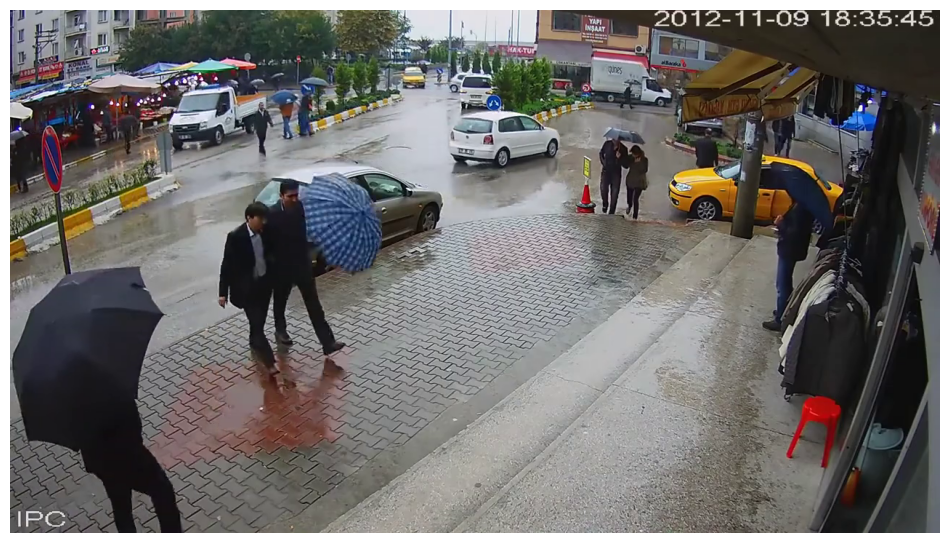

In [8]:
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH,start=1300)
frame = next(generator)


sv.plot_image(frame, (12, 12))

In [9]:
sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

VideoInfo(width=1280, height=720, fps=25, total_frames=1935)

In [10]:
model = YOLO("yolov8x.pt")

results = model(frame, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results)

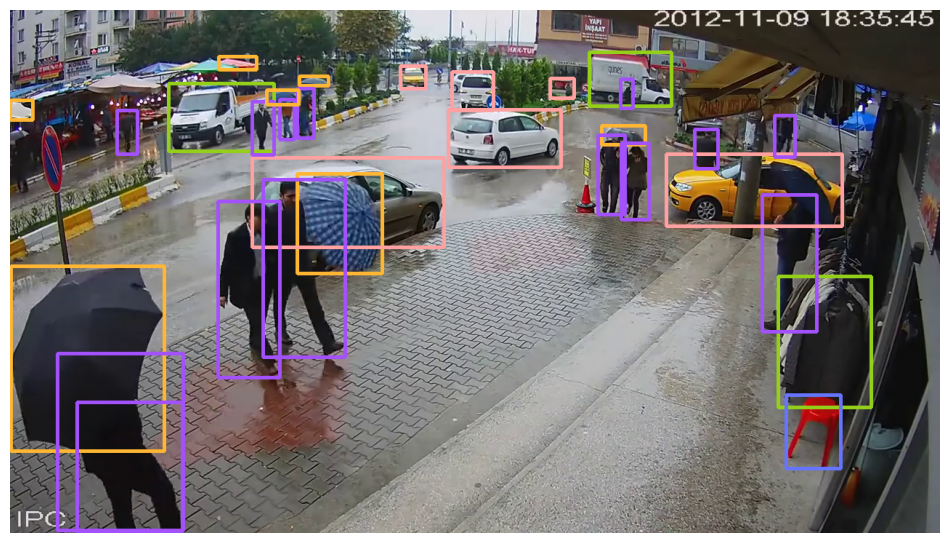

In [11]:
bounding_box_annotator = sv.BoundingBoxAnnotator(thickness=3)
annotated_frame = bounding_box_annotator.annotate(frame.copy(), detections)
sv.plot_image(annotated_frame, (12, 12))

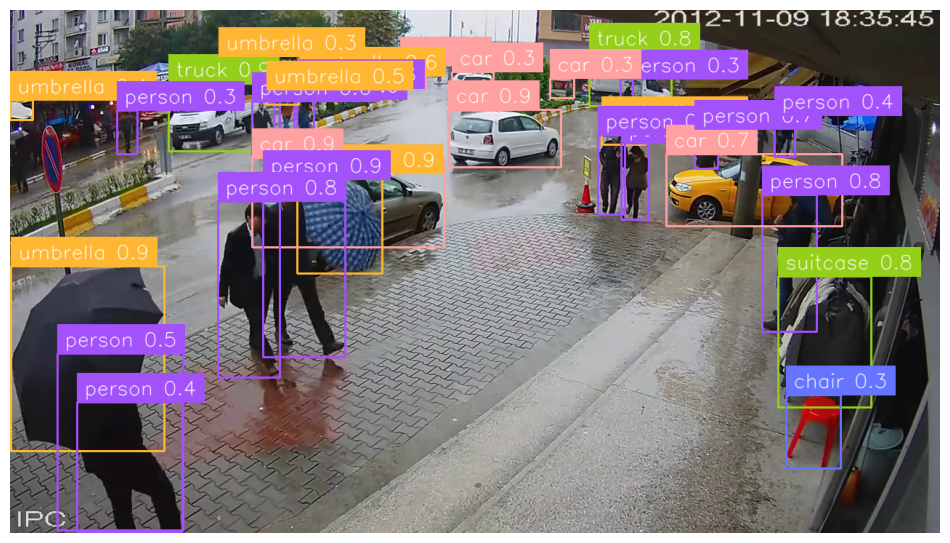

In [ ]:
# labels = [
#     f"{results.names[class_id]} {confidence:0.2f}"
#     for class_id, confidence
#     in zip(detections.class_id, detections.confidence)
# ]
labels = [
    f"{results.names[class_id]} {confidence:0.1f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]


bounding_box_annotator = sv.BoundingBoxAnnotator(thickness=2)
label_annotator = sv.LabelAnnotator(text_thickness=1, text_scale=0.9)

annotated_frame = frame.copy()
annotated_frame = bounding_box_annotator.annotate(annotated_frame, detections)
annotated_frame = label_annotator.annotate(annotated_frame, detections, labels)
sv.plot_image(annotated_frame, (12, 12))

In [28]:
sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

VideoInfo(width=1280, height=720, fps=25, total_frames=1935)

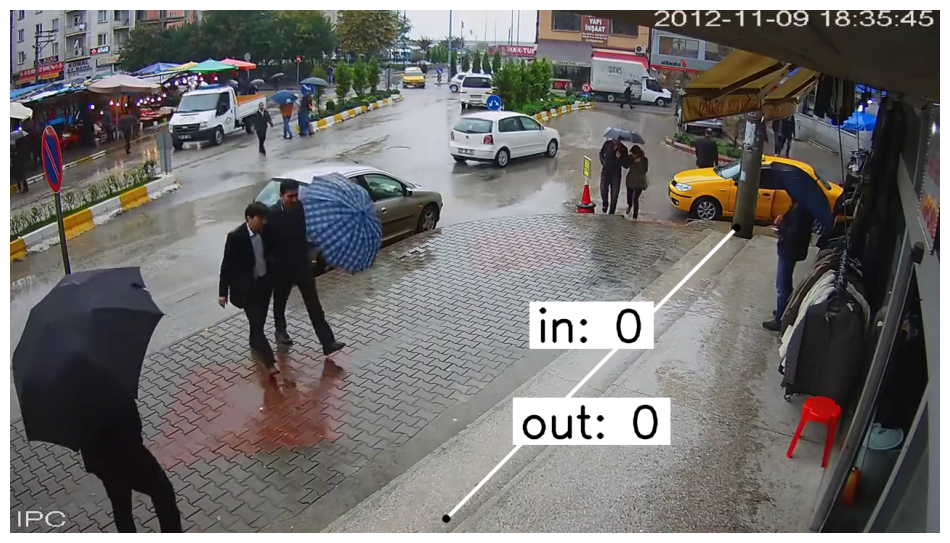

In [52]:
START = sv.Point(1000, 300)
END = sv.Point(600 , 700)

line_zone = sv.LineZone(start=START, end=END)

line_zone_annotator = sv.LineZoneAnnotator(
    thickness=4,
    text_thickness=4,
    text_scale=2)

annotated_frame = frame.copy()
annotated_frame = line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)
sv.plot_image(annotated_frame, (12, 12))

In [53]:
byte_tracker = sv.ByteTrack()

In [54]:
bounding_box_annotator = sv.BoundingBoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=4, text_scale=2)
trace_annotator = sv.TraceAnnotator(thickness=4)

In [51]:
def callback(frame: np.ndarray, index:int) -> np.ndarray:
    results = model(frame, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = byte_tracker.update_with_detections(detections)

    labels = [
        f"#{tracker_id} {model.model.names[class_id]} {confidence:0.2f}"
        for confidence, class_id, tracker_id
        in zip(detections.confidence, detections.class_id, detections.tracker_id)
    ]

    annotated_frame = frame.copy()
    annotated_frame = trace_annotator.annotate(
        scene=annotated_frame,
        detections=detections)
    annotated_frame = bounding_box_annotator.annotate(
        scene=annotated_frame,
        detections=detections)
    annotated_frame = label_annotator.annotate(
        scene=annotated_frame,
        detections=detections,
        labels=labels)

    line_zone.trigger(detections)

    return  line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)

In [55]:
def callback(frame: np.ndarray, index: int) -> np.ndarray:
    results = model(frame, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)
    
    # Filter for people only (assuming class_id 0 is 'person')
    is_person = detections.class_id == 0
    detections = detections[is_person]
    
    detections = byte_tracker.update_with_detections(detections)

    labels = [
        f"#{tracker_id} {model.model.names[class_id]} {confidence:0.2f}"
        for confidence, class_id, tracker_id
        in zip(detections.confidence, detections.class_id, detections.tracker_id)
    ]

    annotated_frame = frame.copy()
    annotated_frame = trace_annotator.annotate(
        scene=annotated_frame,
        detections=detections
    )
    annotated_frame = bounding_box_annotator.annotate(
        scene=annotated_frame,
        detections=detections
    )
    annotated_frame = label_annotator.annotate(
        scene=annotated_frame,
        detections=detections,
        labels=labels
    )

    line_zone.trigger(detections)

    return line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)


In [56]:
TARGET_VIDEO_PATH = "count-objects.mp4"

In [57]:
sv.process_video(
    source_path = SOURCE_VIDEO_PATH,
    target_path = TARGET_VIDEO_PATH,
    callback=callback
)

In [ ]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on GPU
benchmark(model="yolov8n.pt", data="coco8.yaml", imgsz=640, half=False, device=0)